# Customer Service Requests Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
from scipy.stats import kruskal

## 1-Understand the dataset

#### 1.1-Importing the dataset

In [2]:
csra_dataset = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

/tmp/ipykernel_92/1861770403.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  csra_dataset = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


#### 1.2-Visualize the dataset

In [3]:
csra_dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
csra_dataset.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [5]:
csra_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

#### 1.3-Print the columns of the DataFrame

In [6]:
csra_dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [7]:
csra_dataset.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

#### 1.4-Identify the shape of the dataset

In [8]:
csra_dataset.shape

(364558, 53)

#### 1.5-Identify the variables with null values

In [9]:
csra_dataset.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

## 2-Perform basic data exploratory analysis

#### 2.1-Draw a frequency plot to show the number of null values in each column of the DataFrame

<AxesSubplot: title={'center': 'Null Percentage'}>

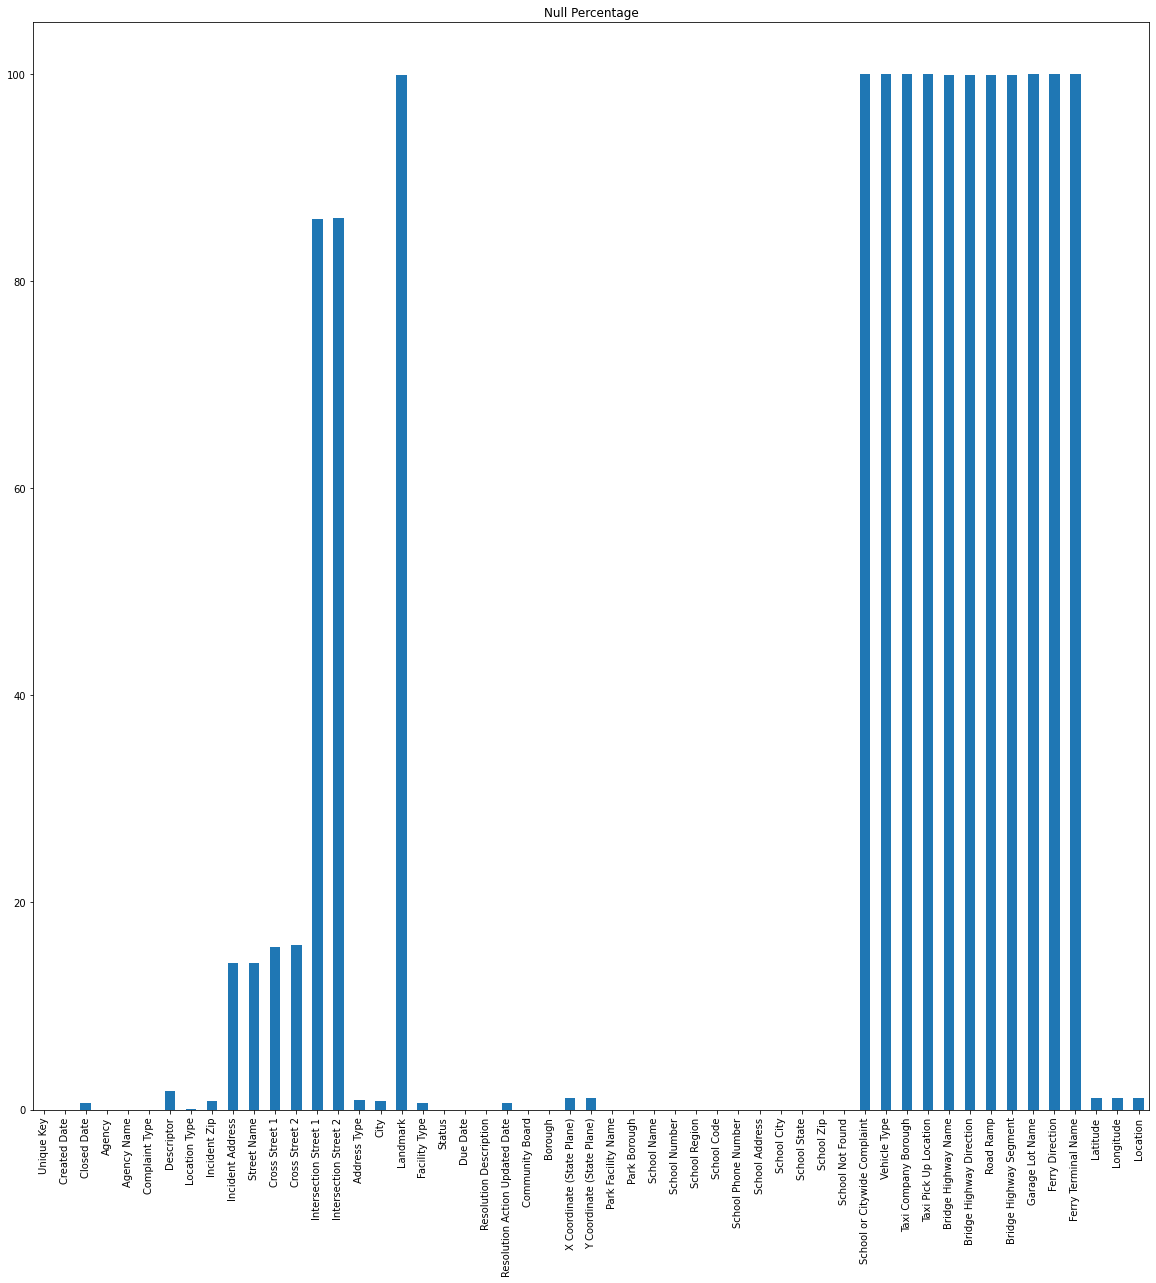

In [10]:
percentile_of_null = csra_dataset.isnull().sum()/len(csra_dataset)*100
percentile_of_null.plot(kind="bar",figsize=(20,20),title="Null Percentage")

<AxesSubplot: title={'center': 'Null Values'}>

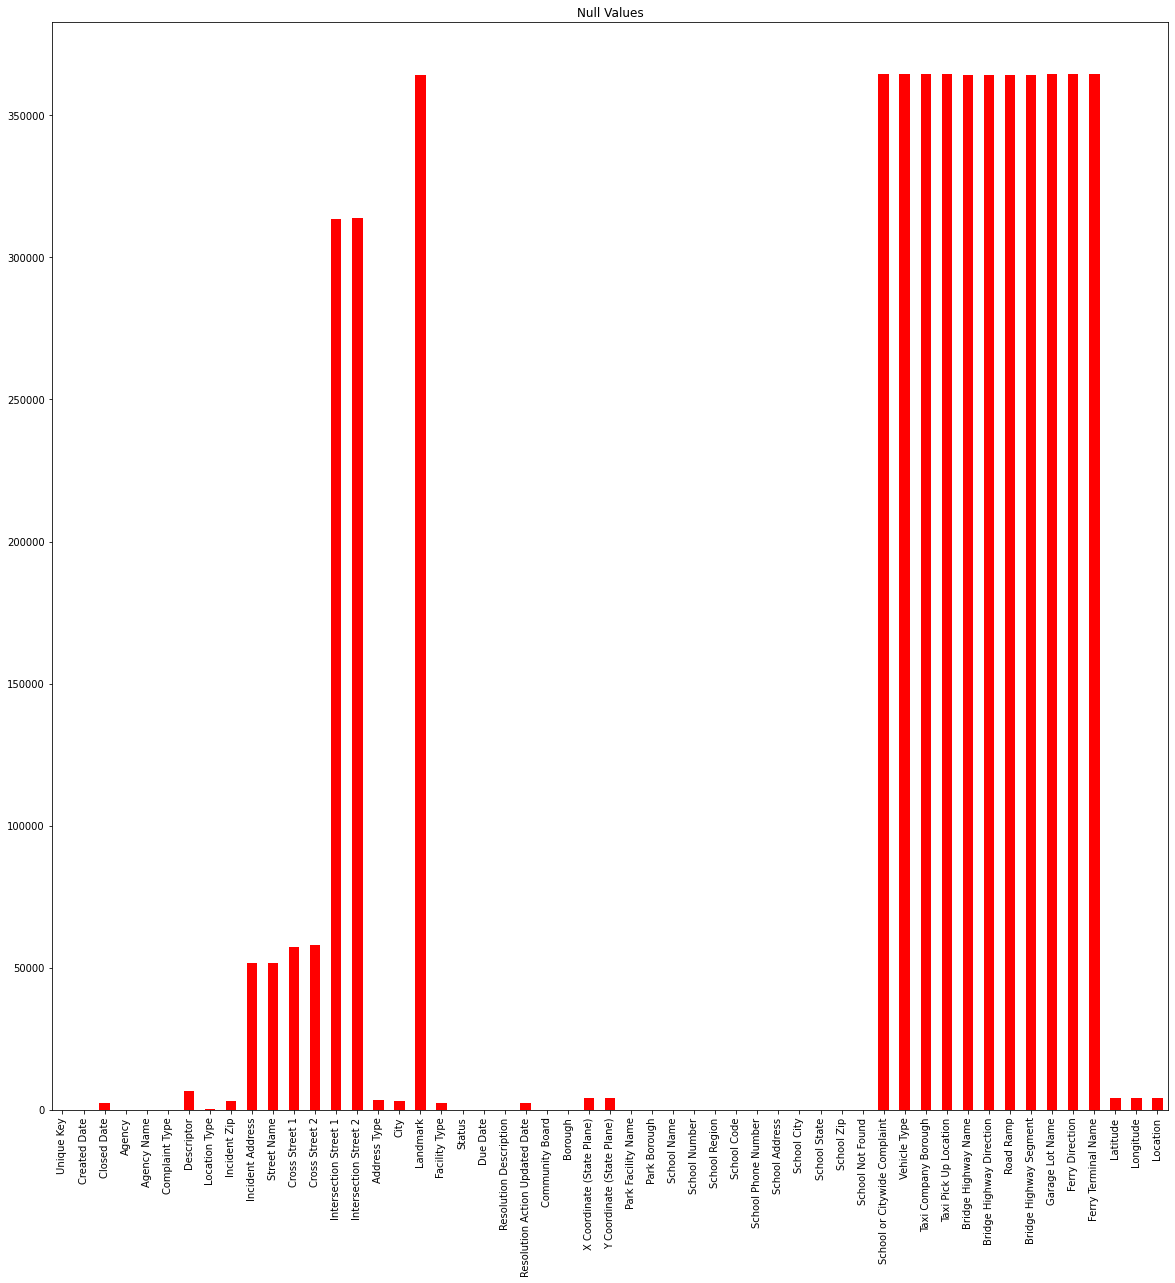

In [11]:
csra_dataset.isnull().sum().plot(kind="bar", figsize=(20,20), title="Null Values", color="red")

#### 2.2-Missing value treatment

##### 2.2.1-Remove the records whose Closed Date values are null

`The first way to remove the records` 

In [12]:
csra_dataset_null_closed_date = csra_dataset[csra_dataset["Closed Date"].notna()]
csra_dataset_null_closed_date

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


`The second way to remove the records` 

In [13]:
csra_dataset = csra_dataset.dropna(subset=["Closed Date"])
csra_dataset

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


#### 2.3-Analyze the date column, and remove entries that have an incorrect timeline

##### 2.3.1-Calculate the time elapsed in closed and creation date

`First we need to convert the Created Date and Closed Date to datetime object`

In [14]:
csra_dataset["Created Date"], csra_dataset["Closed Date"] = (
    csra_dataset["Created Date"].apply(pd.to_datetime),
    csra_dataset["Closed Date"].apply(pd.to_datetime)
)

In [15]:
csra_dataset["Time Elapsed"] = csra_dataset["Closed Date"] - csra_dataset["Created Date"]
csra_dataset["Time Elapsed"]

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Name: Time Elapsed, Length: 362177, dtype: timedelta64[ns]

##### 2.3.2-Convert the calculated date to seconds to get a better representation

In [16]:
csra_dataset["Time Elapsed sec"] = csra_dataset["Time Elapsed"].dt.total_seconds()
csra_dataset["Time Elapsed sec"]

0          3330.0
1          5233.0
2         17494.0
3         27927.0
4         12464.0
           ...   
364553    37067.0
364554     8434.0
364555     1143.0
364556     9653.0
364557    10020.0
Name: Time Elapsed sec, Length: 362177, dtype: float64

##### 2.3.3-View the descriptive statistics for the newly created column

In [17]:
csra_dataset[["Time Elapsed" , "Time Elapsed sec"]].describe()

,Time Elapsed,Time Elapsed sec
count,362177,3.621770e+05
mean,0 days 04:11:53.299632500,1.511330e+04
std,0 days 05:51:42.547519569,2.110255e+04
min,0 days 00:01:01,6.100000e+01
25%,0 days 01:15:33,4.533000e+03
50%,0 days 02:40:16,9.616000e+03
75%,0 days 05:14:38,1.887800e+04
max,24 days 16:52:22,2.134342e+06


In [18]:
csra_dataset[["Time Elapsed" , "Time Elapsed sec"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   Time Elapsed      362177 non-null  timedelta64[ns]
 1   Time Elapsed sec  362177 non-null  float64        
dtypes: float64(1), timedelta64[ns](1)
memory usage: 8.3 MB


`Two new Columns: Time Elapsed & Time Elapsed sec `

In [19]:
csra_dataset[["Time Elapsed" , "Time Elapsed sec"]]

,Time Elapsed,Time Elapsed sec
0,0 days 00:55:30,3330.0
1,0 days 01:27:13,5233.0
2,0 days 04:51:34,17494.0
3,0 days 07:45:27,27927.0
4,0 days 03:27:44,12464.0
...,...,...
364553,0 days 10:17:47,37067.0
364554,0 days 02:20:34,8434.0
364555,0 days 00:19:03,1143.0
364556,0 days 02:40:53,9653.0


##### 2.3.4-Check the number of null values in the Complaint_Type and City columns

In [20]:
csra_dataset[["Complaint Type" , "City"]].isnull().sum()

Complaint Type      0
City              674
dtype: int64

##### 2.3.5-Impute the NA value with Unknown City

In [21]:
csra_dataset["City"] = csra_dataset["City"].fillna("Unknown City")
csra_dataset[["Unique Key","City"]][csra_dataset["City"] == "Unknown City"]

,Unique Key,City
33,32306700,Unknown City
283,32309451,Unknown City
302,32309860,Unknown City
1421,32299438,Unknown City
2131,32294310,Unknown City
...,...,...
361851,29633795,Unknown City
361912,29632589,Unknown City
361975,29633040,Unknown City
362048,29633311,Unknown City


In [22]:
csra_dataset[["Complaint Type" , "City"]].isnull().sum()

Complaint Type    0
City              0
dtype: int64

##### 2.3.6-Draw a frequency plot for the complaints in each city

<AxesSubplot: title={'center': 'Complaint Frequency'}>

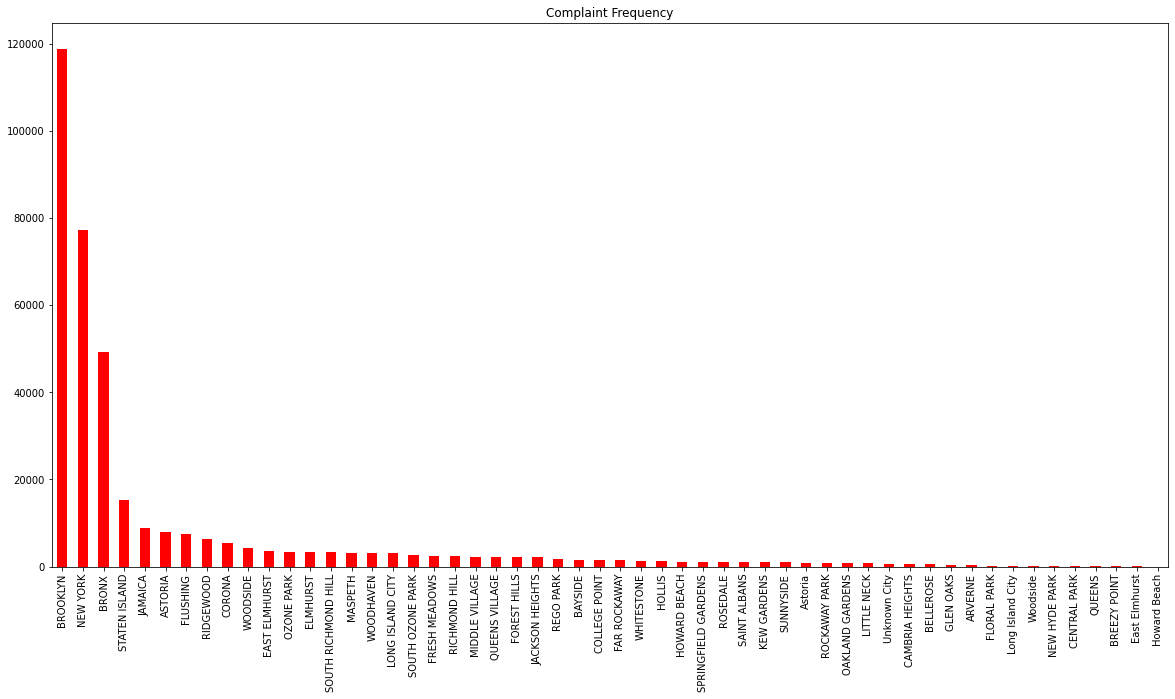

In [23]:
freq_complaint = csra_dataset[["City","Complaint Type"]]
freq_complaint["City"].value_counts().plot(kind="bar",color="red",title="Complaint Frequency",figsize=(20,10))

##### 2.3.7-Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

In [24]:
brooklyn_complaints = csra_dataset[csra_dataset["City"] == "BROOKLYN"]

`Scatter plot for Complaint across Brooklyn`

<AxesSubplot: title={'center': 'Complaints in Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

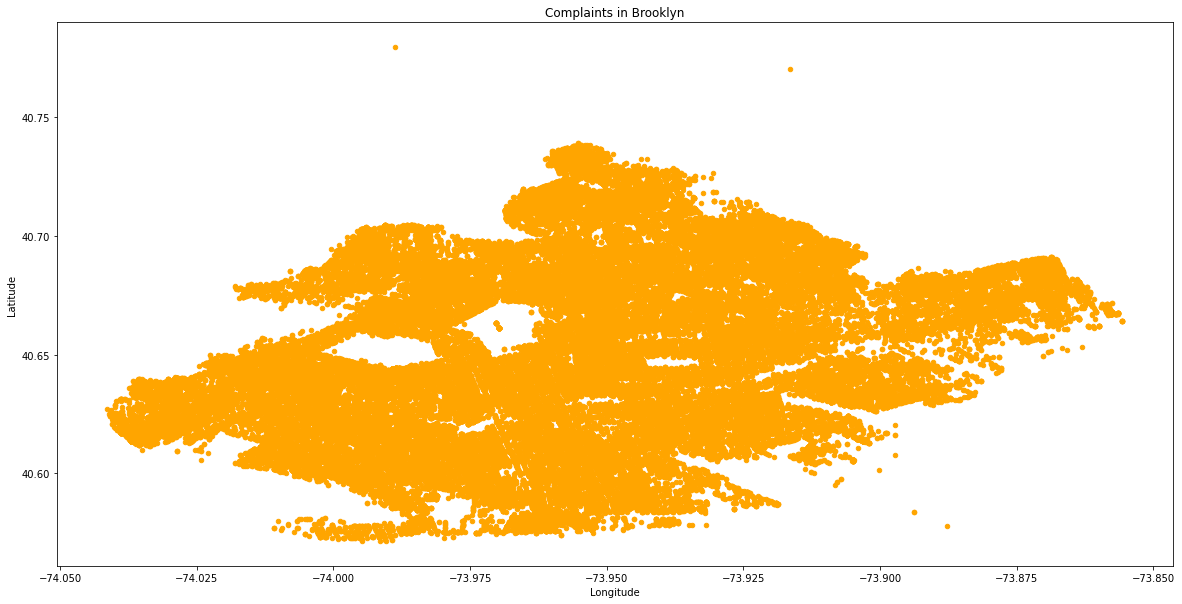

In [25]:
brooklyn_complaints.plot(kind="scatter",y="Latitude",x="Longitude",color="orange",title="Complaints in Brooklyn",figsize=(20,10))

`Hexbin for Complaint across Brooklyn`

<AxesSubplot: title={'center': 'Complaints in Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

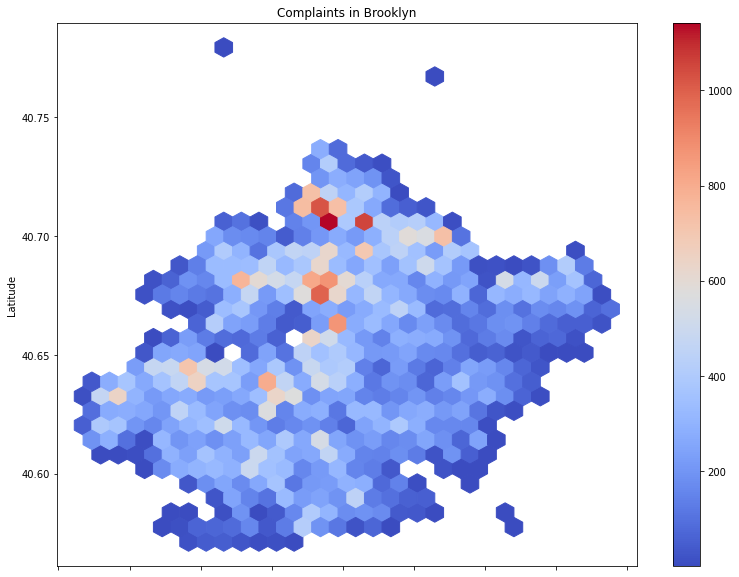

In [26]:
brooklyn_complaints.plot(kind="hexbin",y="Latitude",x="Longitude",gridsize=30,colormap="coolwarm",mincnt=1,title="Complaints in Brooklyn",figsize=(13,10))

## 3-Find major types of complaints

#### 3.1-Plot a bar graph to show the types of complaints

<AxesSubplot: title={'center': 'Complaint Type'}>

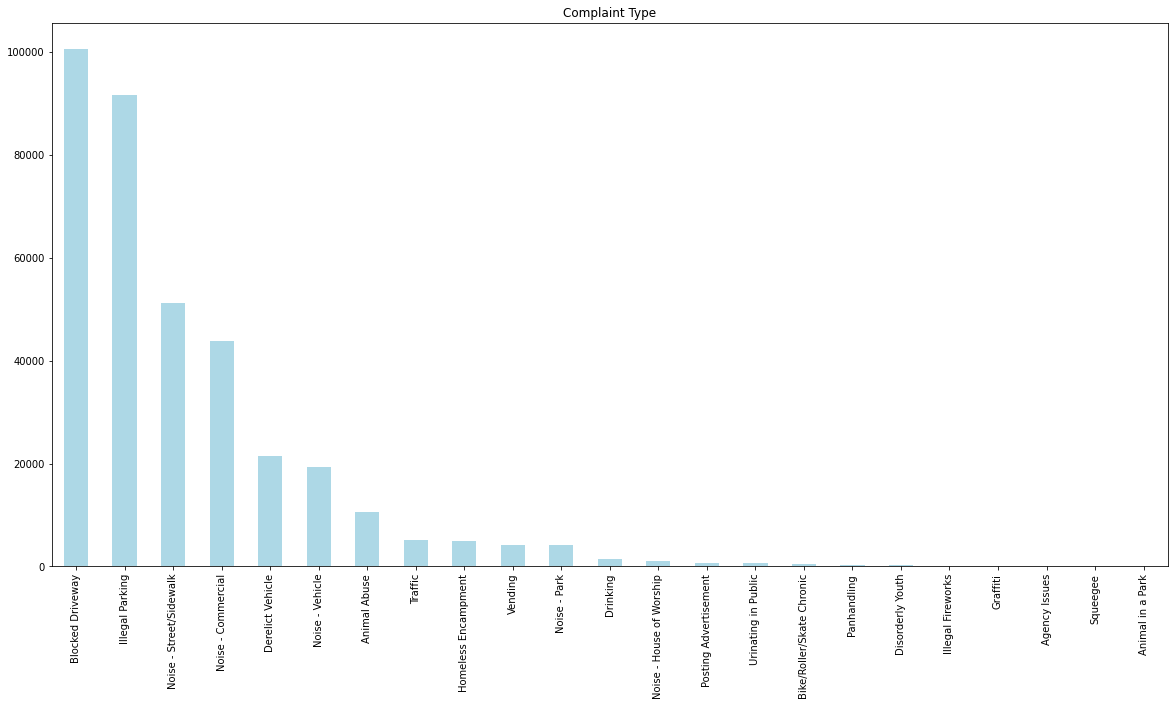

In [27]:
csra_dataset["Complaint Type"].value_counts().plot(kind="bar",title="Complaint Type",color="lightblue",figsize=(20,10))

#### 3.2-Check the frequency of various types of complaints for New York City

In [28]:
newyork_complaints = csra_dataset[csra_dataset["City"] == "NEW YORK"]
newyork_complaints["Complaint Type"].value_counts()

Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint Type, dtype: int64

<AxesSubplot: title={'center': 'New York Complaints'}>

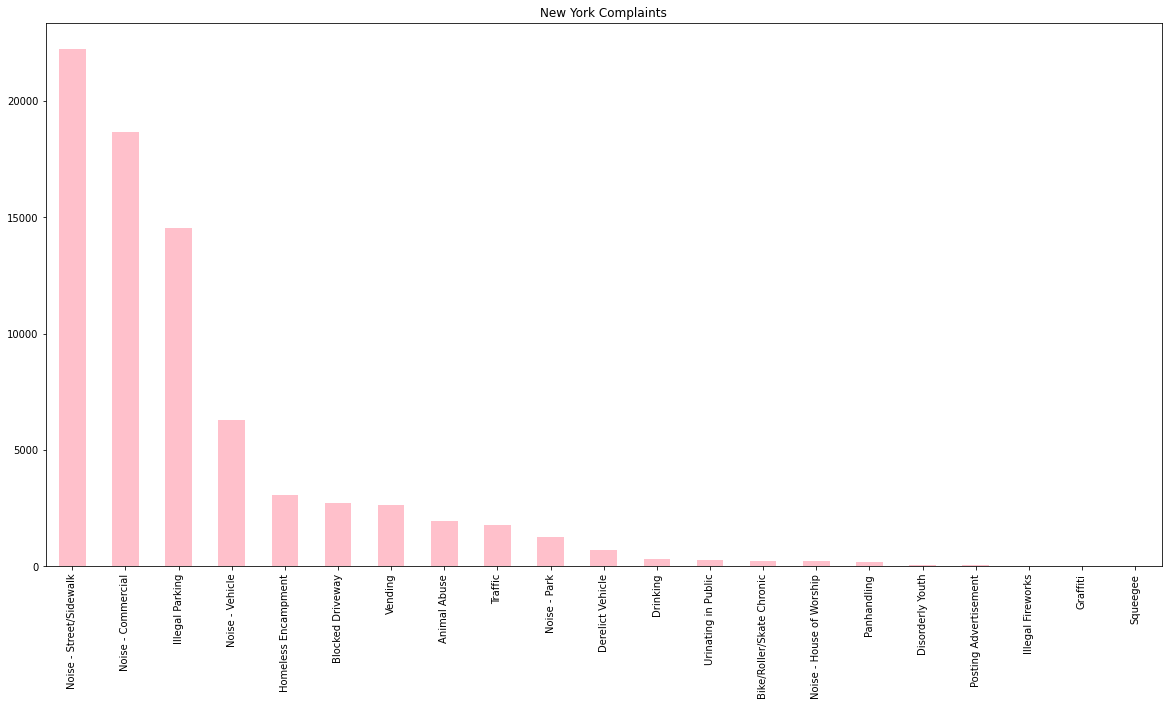

In [29]:
newyork_complaints["Complaint Type"].value_counts().plot(kind="bar",color="pink",figsize=(20,10),title="New York Complaints")

#### 3.3-Find the top 10 complaint types

In [30]:
cmp = (
         csra_dataset["Complaint Type"]
        .value_counts()
        .sort_values(ascending=False)
)
cmp.head(10)

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

#### 3.4-Display the various types of complaints in each city

In [31]:
cities = csra_dataset["City"].astype(str).unique()
city_counts = len(cities)
city_counts

54

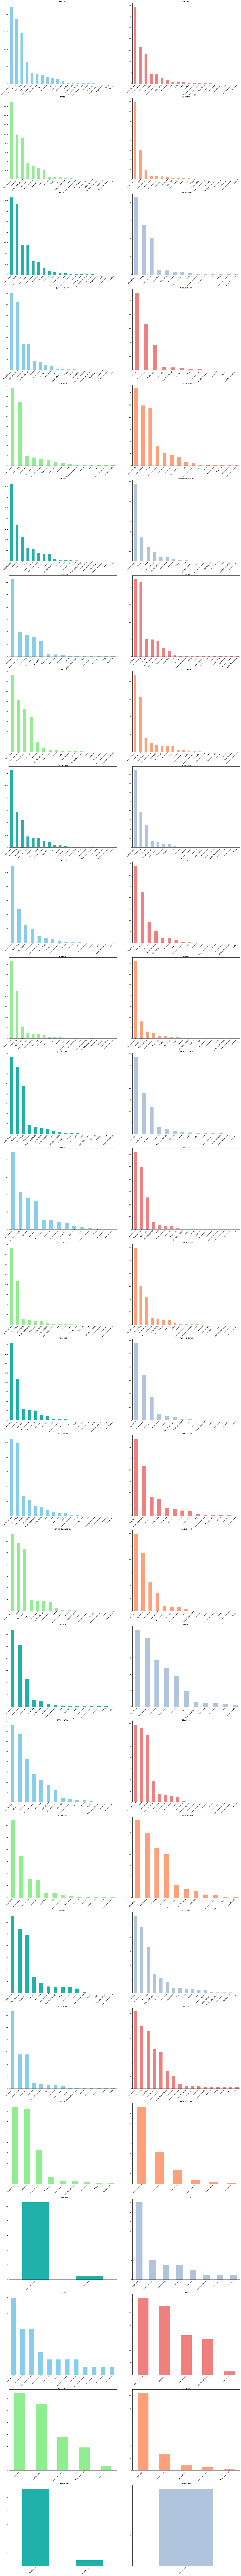

In [32]:
sz = city_counts//2
fig, axes = plt.subplots(sz,2, figsize=(30, 300))
fig.tight_layout(pad=10.0)
row , col = 0 , 0
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightsteelblue']

for i, city in enumerate(cities):
    if col % 2 == 0 and col != 0:
        row = row + 1
        col = 0
    get_city = csra_dataset[csra_dataset["City"] == city]
    complaint = get_city["Complaint Type"].value_counts();
    ax = axes[row][col]
    complaint.plot(kind="bar",ax=ax,color=colors[i % len(colors)])
    ax.set_title(city)
    ax.set_xticklabels(complaint.index, rotation=45, ha="right")
    col = col + 1

plt.show()

#### 3.5-Create a DataFrame, df_new, which contains cities as columns and complaint types in rows

In [33]:
df_new = csra_dataset.groupby(['Complaint Type', 'City']).size().unstack()
df_new = df_new.fillna(0.0)
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
Animal Abuse,46.0,170.0,0.0,53.0,15.0,2.0,1971.0,3191.0,15.0,0.0,...,74.0,40.0,42.0,786.0,40.0,1.0,43.0,57.0,111.0,0.0
Animal in a Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bike/Roller/Skate Chronic,0.0,16.0,0.0,0.0,1.0,0.0,22.0,124.0,0.0,0.0,...,1.0,1.0,0.0,10.0,2.0,2.0,4.0,2.0,5.0,0.0
Blocked Driveway,50.0,3436.0,159.0,514.0,138.0,3.0,17062.0,36445.0,177.0,0.0,...,1202.0,1946.0,330.0,2845.0,278.0,86.0,279.0,1363.0,2038.0,27.0
Derelict Vehicle,32.0,426.0,14.0,231.0,120.0,3.0,2402.0,6257.0,148.0,0.0,...,425.0,356.0,267.0,2184.0,17.0,63.0,279.0,369.0,298.0,8.0
Disorderly Youth,2.0,5.0,0.0,2.0,2.0,0.0,66.0,79.0,0.0,0.0,...,2.0,2.0,0.0,25.0,2.0,0.0,1.0,0.0,1.0,0.0
Drinking,1.0,43.0,0.0,1.0,1.0,1.0,206.0,291.0,0.0,0.0,...,14.0,25.0,6.0,188.0,12.0,3.0,3.0,4.0,15.0,0.0
Graffiti,1.0,4.0,0.0,3.0,0.0,0.0,15.0,60.0,0.0,0.0,...,2.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,4.0,0.0


## 4-Visualize the major types of complaints in each city

#### 4.1-Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types of complaints

<AxesSubplot: xlabel='Complaint Type'>

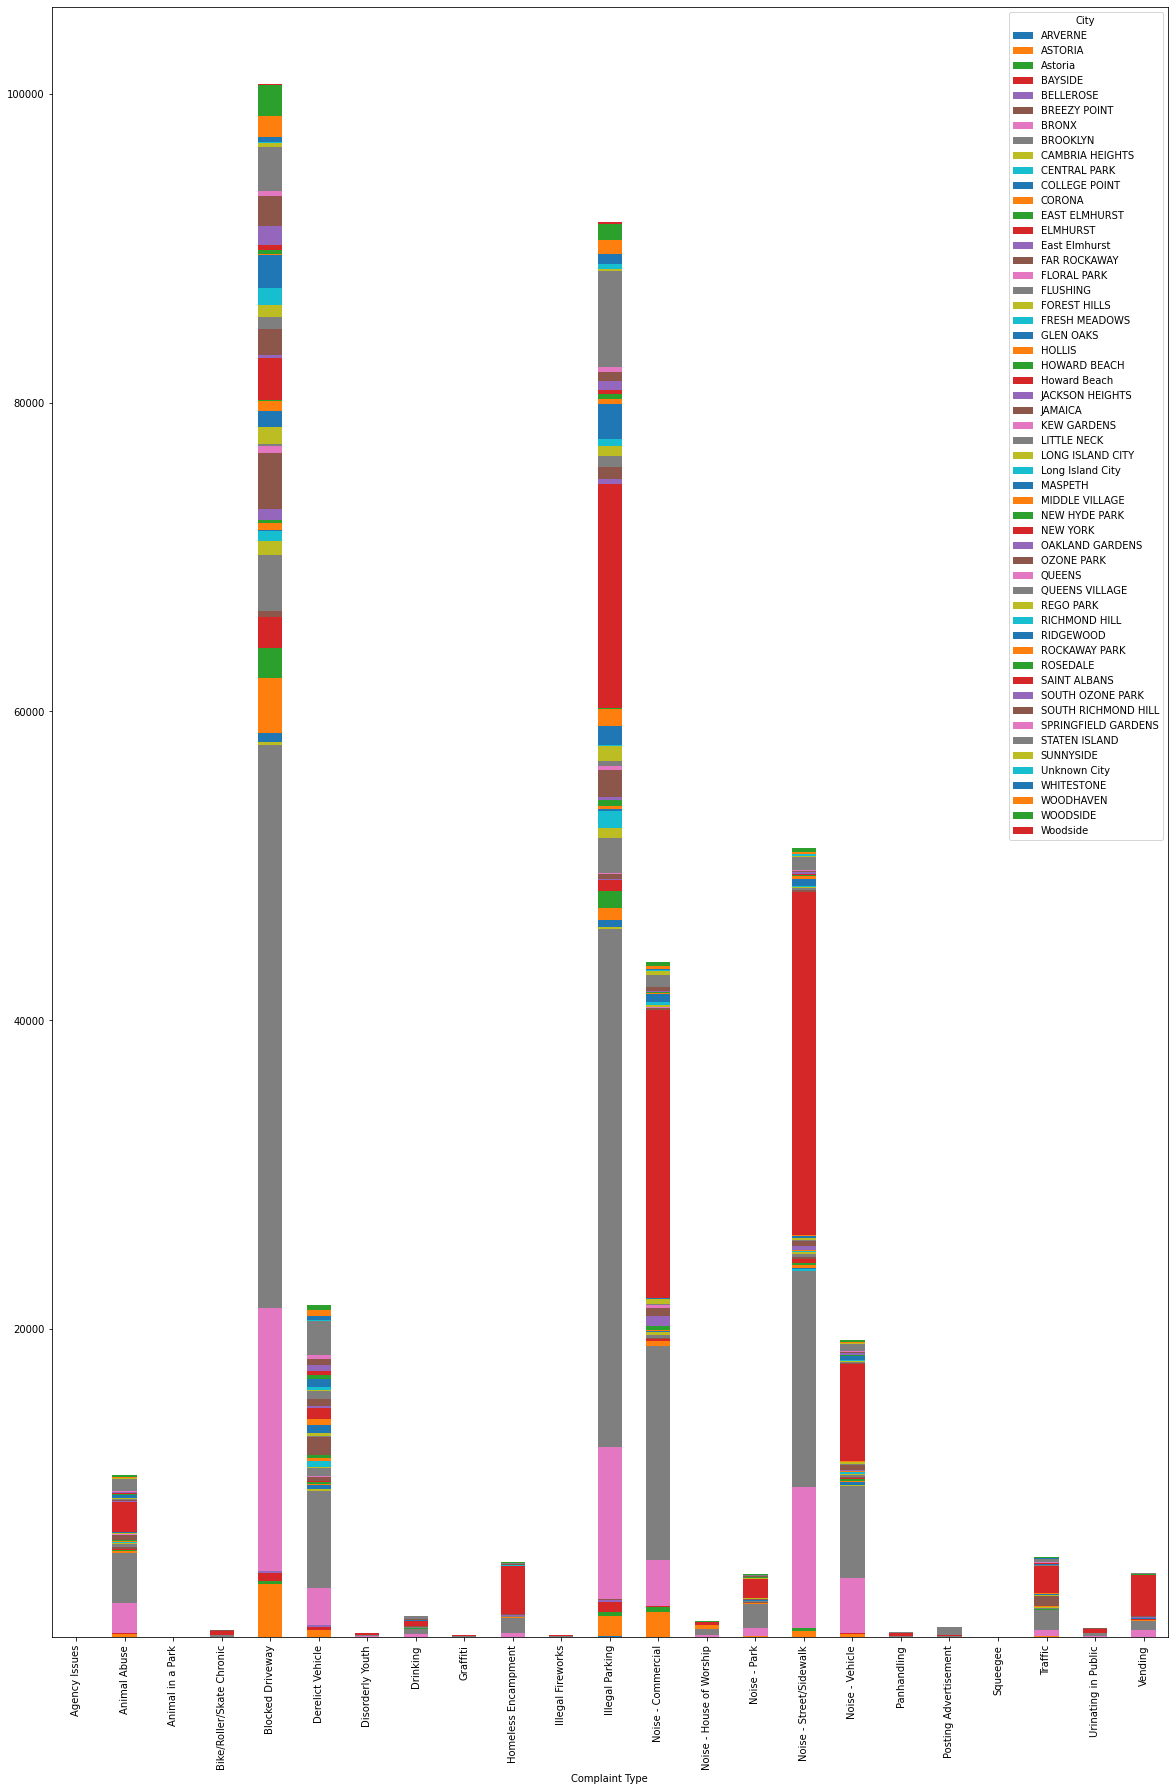

In [34]:
cities_and_complaint = df_new
cities_and_complaint.plot(kind="bar",figsize=(20,30),stacked=True)

#### 4.2-Sort the complaint types based on the average Request_Closing_Time grouping them for different locations (( HERE ))

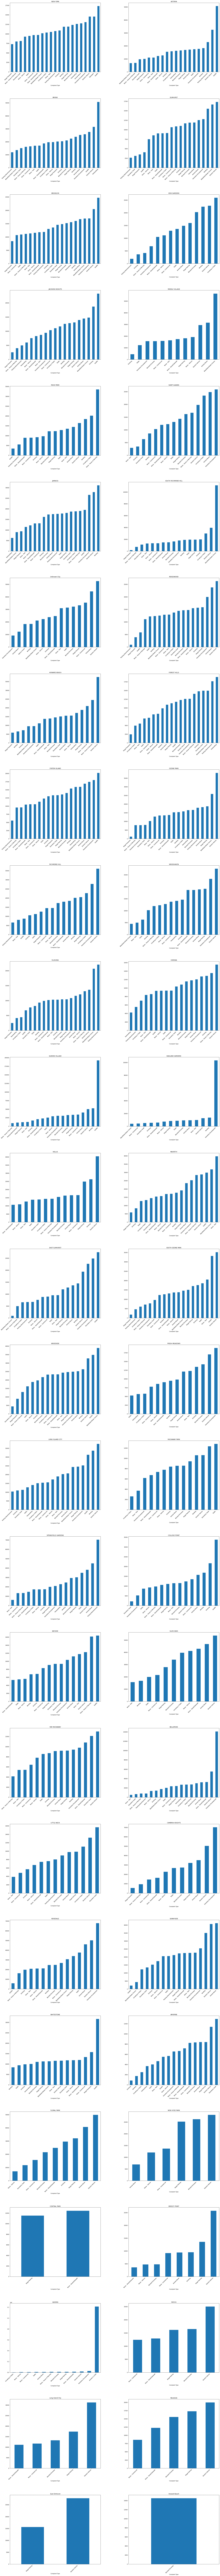

In [35]:
sz = city_counts//2
fig, axes = plt.subplots(sz,2, figsize=(30, 300))
fig.tight_layout(pad=20.0) 
mapping_cities = csra_dataset.groupby(['City', 'Complaint Type'])["Time Elapsed sec"].mean()
row , col = 0 , 0
for i, city in enumerate(cities):
    if col % 2 == 0 and col != 0:
        row = row + 1
        col = 0
    get_city = mapping_cities[city].sort_values()
    ax = axes[row][col]
    get_city.plot(kind="bar",ax=ax)
    ax.set_title(city)
    ax.set_xticklabels(get_city.index, rotation=45, ha="right")
    col = col + 1



## 5-See whether the average response time across different complaint types is similar (overall)

` Kruskal-Wallis H Test, To check if time across types are similar`

In [36]:
complaint_type_data = []

for complaint_type in csra_dataset["Complaint Type"].unique():
    complaint_type_data.append(
        csra_dataset[csra_dataset["Complaint Type"] == complaint_type]["Time Elapsed sec"]
    )
    
statistic, p_value = kruskal(*complaint_type_data)

print('Statistics= %.3f, p-value = %.3f\n' % (statistic, p_value))

if p_value > 0.05:
    print("Fail to reject H0: All sample distributions are equal")
else:
    print("Reject H0: One or more sample distributions are not equal")

Statistics= 11988.269, p-value = 0.000

Reject H0: One or more sample distributions are not equal


`One-Way ANOVA Test, To check if time across types are similar`

In [37]:
stat, p = f_oneway(*complaint_type_data)
print('Statistics= %.3f, p-value = %.3f\n' % (stat, p))

if p > 0.05:
    print("Failed to reject the null hypothesis: No significant difference in response times among complaint types.")
else:
    print("Null hypothesis rejected: There are significant differences in response times among complaint types.")

Statistics= 565.262, p-value = 0.000

Null hypothesis rejected: There are significant differences in response times among complaint types.


In [38]:
avg_elpased_time_complaint = csra_dataset.groupby(["Complaint Type"])["Time Elapsed sec"].mean().sort_values()
avg_elpased_time_complaint

Complaint Type
Posting Advertisement        7.286256e+03
Illegal Fireworks            1.011348e+04
Noise - Commercial           1.108576e+04
Noise - House of Worship     1.139109e+04
Noise - Park                 1.222606e+04
Noise - Street/Sidewalk      1.223130e+04
Traffic                      1.230912e+04
Disorderly Youth             1.236375e+04
Noise - Vehicle              1.256180e+04
Urinating in Public          1.295929e+04
Bike/Roller/Skate Chronic    1.312369e+04
Drinking                     1.382130e+04
Vending                      1.436628e+04
Squeegee                     1.456025e+04
Homeless Encampment          1.545138e+04
Illegal Parking              1.565044e+04
Panhandling                  1.585355e+04
Blocked Driveway             1.623252e+04
Animal Abuse                 1.803256e+04
Agency Issues                1.828912e+04
Graffiti                     2.327634e+04
Derelict Vehicle             2.535960e+04
Animal in a Park             1.212634e+06
Name: Time Elapsed 

### -The major types of complaints in each city.

In [39]:
mapping_cities = csra_dataset.groupby(['City', 'Complaint Type'])["Time Elapsed sec"].mean()
mp = {}
for i, city in enumerate(cities):
    get_city = mapping_cities[city].sort_values(ascending=False)
    mp[city] = get_city.keys()[0]
mp_df = pd.DataFrame({"City":list(mp.keys()) , "Major Type of Complaint": list(mp.values())})
mp_df = mp_df.sort_values(by="City",ascending=True)
mp_df

,City,Major Type of Complaint
43,ARVERNE,Disorderly Youth
1,ASTORIA,Graffiti
49,Astoria,Derelict Vehicle
34,BAYSIDE,Graffiti
37,BELLEROSE,Homeless Encampment
47,BREEZY POINT,Derelict Vehicle
2,BRONX,Panhandling
4,BROOKLYN,Graffiti
39,CAMBRIA HEIGHTS,Homeless Encampment
46,CENTRAL PARK,Noise - Street/Sidewalk
